In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
zip_code = "data_set/zip_code.csv"
zip_code_df = pd.read_csv(zip_code)
zip_code_df.head()

,ZIP,Neighborhood,Borough,Cases,"Cases per 100,000","Deaths per 100,000",Percent positive<br>(of people tested)
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,420,1782.45,106.10,6.95
1,10002,Chinatown/Lower East Side,Manhattan,1237,1611.61,208.45,10.00
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,516,959.08,63.20,5.39
3,10004,Financial District,Manhattan,39,1068.32,27.39,6.04
4,10005,Financial District,Manhattan,81,964.73,23.82,5.31


In [3]:
median = "data_set/median-incomes.csv"
median_income_df = pd.read_csv(median, quoting=csv.QUOTE_MINIMAL, skipinitialspace=True, )
median_income_df.head()

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
0,Riverdale,All Households,2005,Dollars,60686.21876,208
1,Williamsbridge,All Households,2005,Dollars,49881.99032,212
2,Throgs Neck,All Households,2005,Dollars,55211.28961,210
3,Pelham Parkway,All Households,2005,Dollars,50494.64003,211
4,Morrisania,All Households,2005,Dollars,23524.24268,203


In [4]:
median_income_df.dtypes

Location           object
Household Type     object
TimeFrame           int64
DataFormat         object
Data              float64
Fips                int64
dtype: object

In [5]:
household = median_income_df.loc[(median_income_df['Household Type'] == 'All Households')]
household.head()

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
0,Riverdale,All Households,2005,Dollars,60686.21876,208
1,Williamsbridge,All Households,2005,Dollars,49881.99032,212
2,Throgs Neck,All Households,2005,Dollars,55211.28961,210
3,Pelham Parkway,All Households,2005,Dollars,50494.64003,211
4,Morrisania,All Households,2005,Dollars,23524.24268,203


In [6]:
time = household.loc[(household["TimeFrame"] == 2018)]
time.tail()

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
3440,Brooklyn,All Households,2018,Dollars,61220.0,36047
3441,Manhattan,All Households,2018,Dollars,85066.0,36061
3442,Queens,All Households,2018,Dollars,69320.0,36081
3443,Staten Island,All Households,2018,Dollars,82166.0,36085
3444,New York City,All Households,2018,Dollars,63799.0,3651000


In [7]:
boroughs = time.tail(6)
boroughs

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
3439,Bronx,All Households,2018,Dollars,38467.0,36005
3440,Brooklyn,All Households,2018,Dollars,61220.0,36047
3441,Manhattan,All Households,2018,Dollars,85066.0,36061
3442,Queens,All Households,2018,Dollars,69320.0,36081
3443,Staten Island,All Households,2018,Dollars,82166.0,36085
3444,New York City,All Households,2018,Dollars,63799.0,3651000


In [8]:
borough = boroughs.drop(['Household Type', 'DataFormat', 'TimeFrame', 'Fips'], axis=1)

borough.columns = ["Borough", "average_household_income"]
borough

,Borough,average_household_income
3439,Bronx,38467.0
3440,Brooklyn,61220.0
3441,Manhattan,85066.0
3442,Queens,69320.0
3443,Staten Island,82166.0
3444,New York City,63799.0


In [9]:
#spec_chars = [",", "$"]


#for char in spec_chars:
    #borough['average_household_income'] = borough['average_household_income'].str.replace(char,'')

borough.head()

,Borough,average_household_income
3439,Bronx,38467.0
3440,Brooklyn,61220.0
3441,Manhattan,85066.0
3442,Queens,69320.0
3443,Staten Island,82166.0


In [10]:
#borough['average_household_income'] = borough['average_household_income'].str.split().str.join("")

In [11]:
borough.head()

,Borough,average_household_income
3439,Bronx,38467.0
3440,Brooklyn,61220.0
3441,Manhattan,85066.0
3442,Queens,69320.0
3443,Staten Island,82166.0


In [12]:
by_boro = "data_set/by-boro.csv"
by_boro_df = pd.read_csv(by_boro)
by_boro_df = by_boro_df.rename(columns={"BOROUGH_GROUP":"Borough"})

In [13]:
df_merge = pd.merge(by_boro_df, borough, on='Borough')
df_merge.head()


,Borough,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,average_household_income
0,Bronx,3494.37,883.30,274.70,50044,12650,3934,38467.0
1,Brooklyn,2403.26,612.78,217.78,62072,15827,5625,61220.0
2,Manhattan,1772.15,502.24,153.99,28863,8180,2508,85066.0
3,Queens,2970.68,760.41,261.57,67699,17329,5961,69320.0
4,Staten Island,3078.04,507.37,188.16,14657,2416,896,82166.0


In [14]:
#case_income = plt.scatter(df_merge.CASE_COUNT, df_merge.average_household_income, marker="o", facecolors="red", edgecolors="black")
#plt.title("Case Count vs Avg Household Income")
#plt.xlabel("Case Count")
#plt.ylabel("Avg Household Income")
#plt.annotate("  Bronx", (50044, 38467.00))
#plt.annotate("  Brooklyn", (62072, 61220.0))
#plt.annotate("  Manhattan", (28863, 85066.00))
#plt.annotate("Queens", (67699, 69320.00))
#plt.annotate("  Staten Island", (14657, 82166.00))

#plt.ylim(35000,90000)
#plt.savefig('Data_PNG/case_count_vs_income.png')
#plt.show()


In [71]:
df_sorted= df_merge.sort_values('average_household_income')

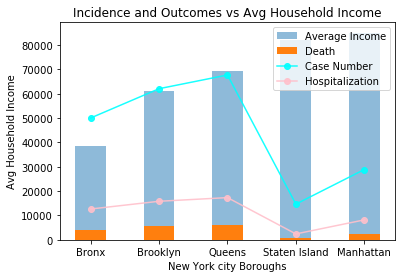

In [106]:


p1 = plt.bar(df_sorted.Borough, df_sorted.average_household_income, width = 0.45, alpha=0.5)
p2 = plt.bar(df_sorted.Borough, df_sorted.DEATH_COUNT, width = 0.45, alpha=1)
p3 = plt.plot(df_sorted.Borough, df_sorted.CASE_COUNT, alpha=0.9, color='cyan', marker='o')
p4 = plt.plot(df_sorted.Borough, df_sorted.HOSPITALIZED_COUNT, alpha=0.9, color='pink', marker='o')


plt.title("Incidence and Outcomes vs Avg Household Income")
plt.xlabel("New York city Boroughs")
plt.ylabel("Avg Household Income")
plt.legend((p1[0], p2[0], p3[0], p4[0]),('Average Income', 'Death', 'Case Number', 'Hospitalization'))
plt.savefig('Data_PNG/outcomes_bar.png', dpi=150)

plt.show()


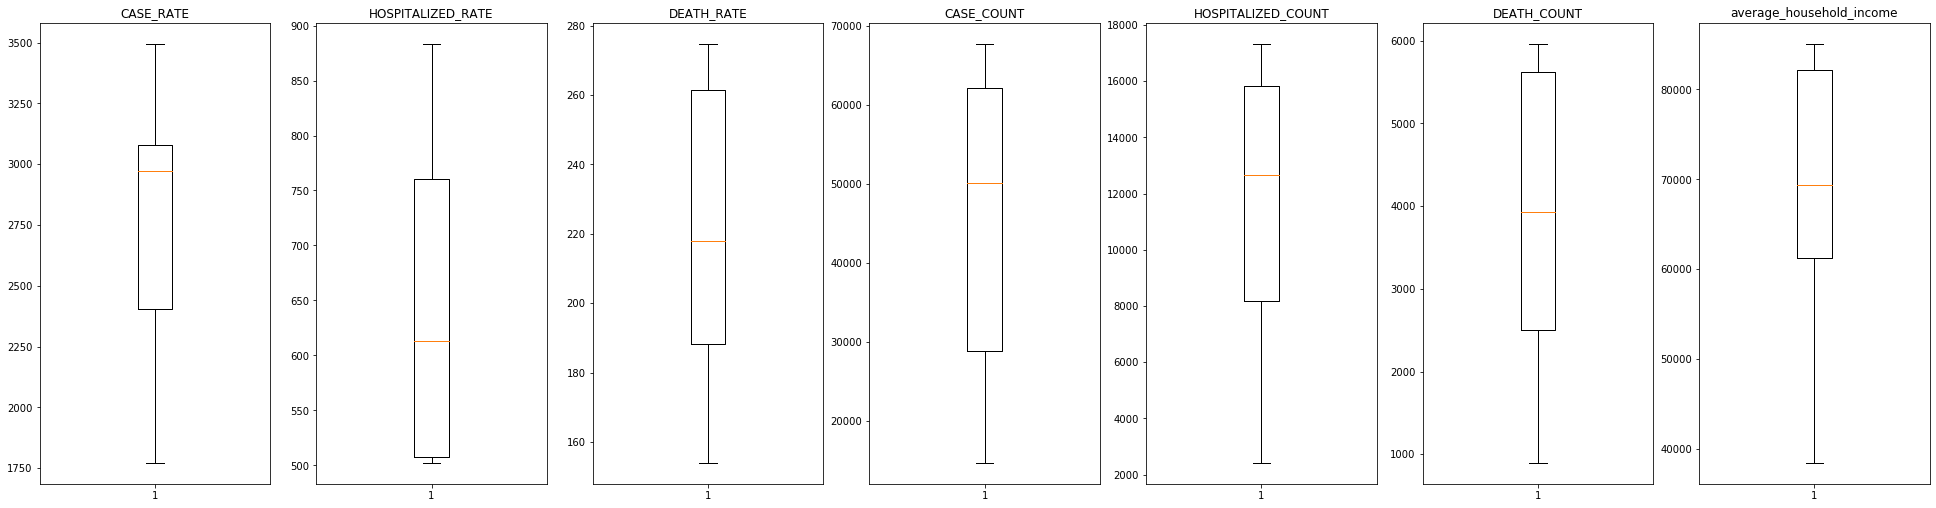

In [107]:
plt.figure(1, figsize=(14,8))
for i in range(1,8):
    plt.subplot(1,7,i)
    plt.boxplot(df_merge[df_merge.columns[i]])
    plt.title(df_merge.columns[i])
#     plt.close
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.savefig('Data_PNG/boxplot.png', dpi=150)   
plt.show()



In [46]:
correlation = df_merge.corr()['DEATH_COUNT']

print(correlation)

CASE_RATE                   0.044661
HOSPITALIZED_RATE           0.571474
DEATH_RATE                  0.633224
CASE_COUNT                  0.994003
HOSPITALIZED_COUNT          0.992900
DEATH_COUNT                 1.000000
average_household_income   -0.480167
Name: DEATH_COUNT, dtype: float64


In [48]:
correlation = df_merge.corr()['average_household_income']

print(correlation)

CASE_RATE                  -0.625951
HOSPITALIZED_RATE          -0.884818
DEATH_RATE                 -0.828917
CASE_COUNT                 -0.558926
HOSPITALIZED_COUNT         -0.530664
DEATH_COUNT                -0.480167
average_household_income    1.000000
Name: average_household_income, dtype: float64


In [49]:
correlation = df_merge.corr()['CASE_RATE']

print(correlation)

CASE_RATE                   1.000000
HOSPITALIZED_RATE           0.696011
DEATH_RATE                  0.779971
CASE_COUNT                  0.144409
HOSPITALIZED_COUNT          0.055576
DEATH_COUNT                 0.044661
average_household_income   -0.625951
Name: CASE_RATE, dtype: float64
